### PART 1: Prepare the dataset for training

The dataset we chose is Microsoft Stocks data.

In [38]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
data = pd.read_csv('MSFT.csv',index_col=0)
data.index = pd.to_datetime(data.index)
# Considering data from the year 2000.
data = data['2000':] 

#### Main statistics about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5167 entries, 2000-01-03 to 2020-07-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5167 non-null   float64
 1   High       5167 non-null   float64
 2   Low        5167 non-null   float64
 3   Close      5167 non-null   float64
 4   Adj Close  5167 non-null   float64
 5   Volume     5167 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 282.6 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5.167000e+03
mean,45.778016,46.255222,45.292997,45.785621,39.537560,5.501146e+07
std,35.080640,35.425804,34.695992,35.094032,37.022653,3.139550e+07
min,15.200000,15.620000,14.870000,15.150000,11.666746,7.425600e+06
25%,26.620001,26.900000,26.340000,26.610001,19.095562,3.299635e+07
50%,29.969999,30.240000,29.690001,29.980000,22.433807,5.029660e+07
75%,47.495001,47.933750,46.994999,47.551251,41.986220,6.853290e+07
max,216.330002,216.380005,211.470001,214.320007,214.320007,5.910522e+08


####  Visual representation of the dataset

Text(0.5, 1.0, 'Closing Price vs Date')

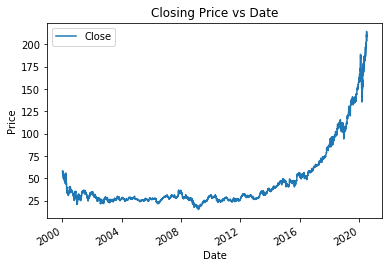

In [40]:
data1 = pd.DataFrame(data['Close'])
data1.plot()
plt.ylabel("Price")
plt.title("Closing Price vs Date")

Text(0.5, 1.0, 'Closing Price vs Date for stationary data')

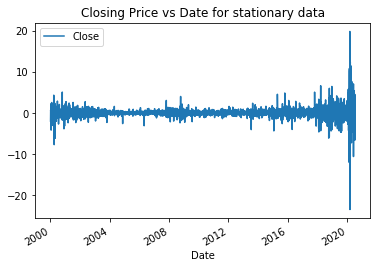

In [6]:
# Making data stationary
## By the diff(1) we are making the data stationary, so order of Integration(d) = 1
xs = data1.diff()
xs=xs.dropna()

# Visualization of the stationary data.
xs.plot()
plt.title("Closing Price vs Date for stationary data")


#### auto_erima from pmdarima
The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model,
settling on a single fitted ARIMA model. The ideal values to choose are the ones with lowest AIC and BIC values.
Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or
Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, 
max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

We ran auto_arima on our entire stationary and non stationary data. Following are the results.

In [39]:

stepwise_model = pm.auto_arima(xs, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=15898.362, BIC=15931.099, Time=35.825 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=24036.686, BIC=24049.781, Time=0.294 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=20249.606, BIC=20275.795, Time=3.864 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=16360.597, BIC=16386.786, Time=23.283 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=24034.688, BIC=24041.235, Time=0.200 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=18990.417, BIC=19016.607, Time=8.541 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=15916.209, BIC=1

In [41]:

stepwise_model = pm.auto_arima(data1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=15850.363, BIC=15883.100, Time=22.868 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=19317.503, BIC=19330.598, Time=0.279 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=17868.223, BIC=17894.413, Time=4.277 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=15886.195, BIC=15912.385, Time=32.224 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=19315.512, BIC=19322.060, Time=0.207 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=18983.369, BIC=19009.559, Time=1.927 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=15840.185, BIC=15879.470, Time=37.994 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the bord

### Main statistics of the stationary dataset

In [7]:
print(data.head())
print(data.shape)
print(data.columns)
print(data.tail())
data.info()

                Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-01-03  58.68750  59.3125  56.00000  58.28125  37.289700  53228400
2000-01-04  56.78125  58.5625  56.12500  56.31250  36.030037  54119000
2000-01-05  55.56250  58.1875  54.68750  56.90625  36.409924  64059600
2000-01-06  56.09375  56.9375  54.18750  55.00000  35.190277  54976600
2000-01-07  54.31250  56.1250  53.65625  55.71875  35.650139  62013600
(5167, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-07-10  213.619995  214.080002  211.080002  213.669998  213.669998   
2020-07-13  214.479996  215.800003  206.500000  207.070007  207.070007   
2020-07-14  206.130005  208.850006  202.029999  208.350006  208.350006   
2020-07-15  209.559998  211.330002  205.0299

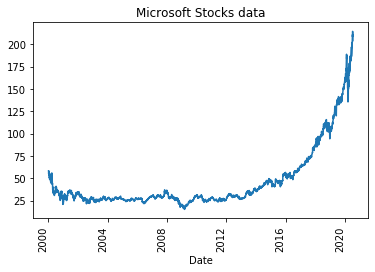

In [8]:
data['Close'].plot()
plt.title("Microsoft Stocks data")
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

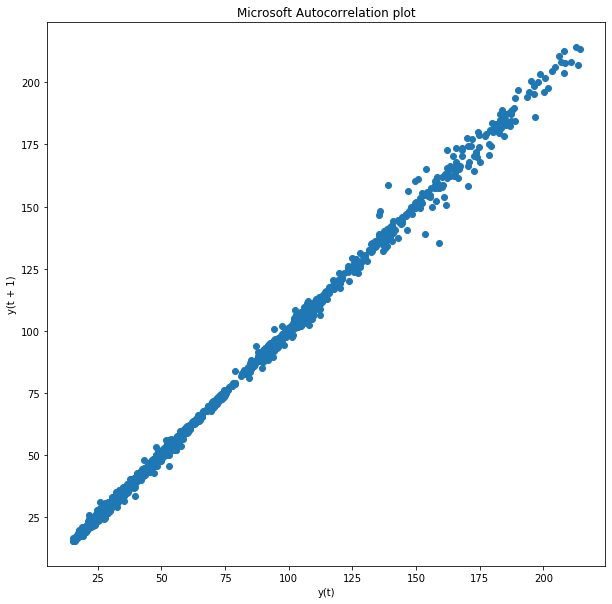

In [9]:

plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=1)
plt.title('Microsoft Autocorrelation plot')

c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


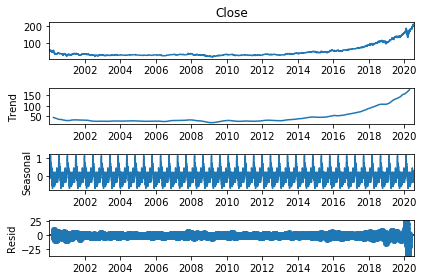

In [10]:
# Checking the trends, seasonality and residuals

result = seasonal_decompose(data['Close'], freq=120)
fig = result.plot()

In [11]:
print(data['Close']-data['Close'].shift(1))

Date
2000-01-03         NaN
2000-01-04   -1.968750
2000-01-05    0.593750
2000-01-06   -1.906250
2000-01-07    0.718750
                ...   
2020-07-10   -0.650009
2020-07-13   -6.599991
2020-07-14    1.279999
2020-07-15   -0.310013
2020-07-16   -4.119995
Name: Close, Length: 5167, dtype: float64


Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

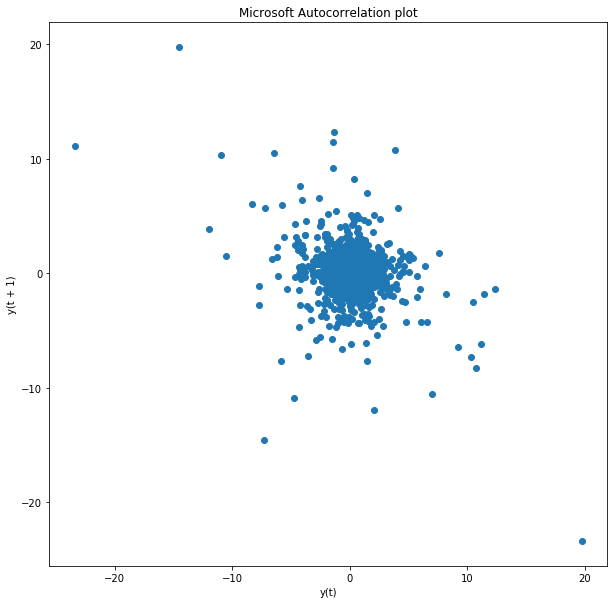

In [12]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,10))
lag_plot((data['Close']-data['Close'].shift(1)), lag=1)
plt.title('Microsoft Autocorrelation plot')

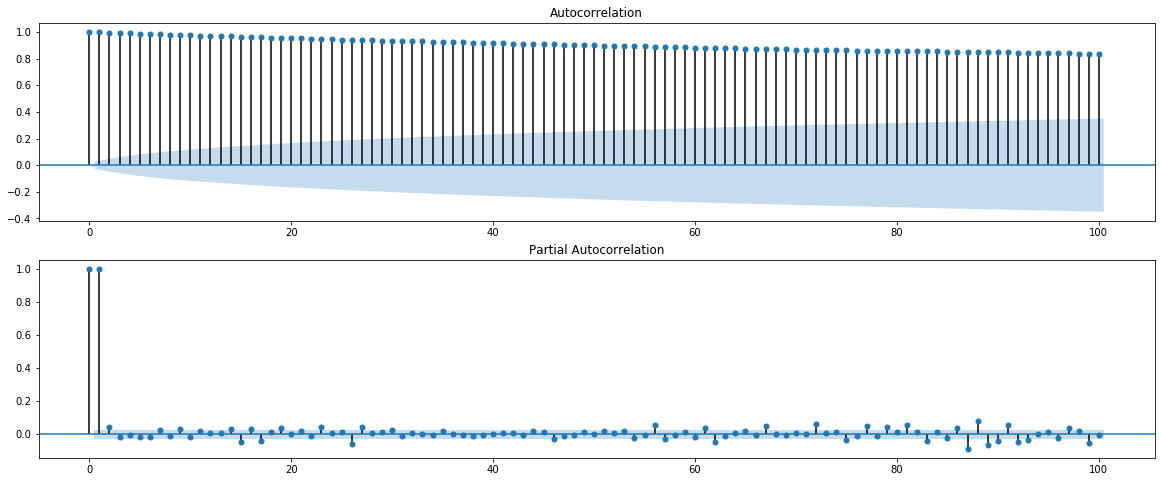

In [13]:
# Plotting ACF and PACF for the data without shift

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Close'],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'],lags=100,ax=ax2)

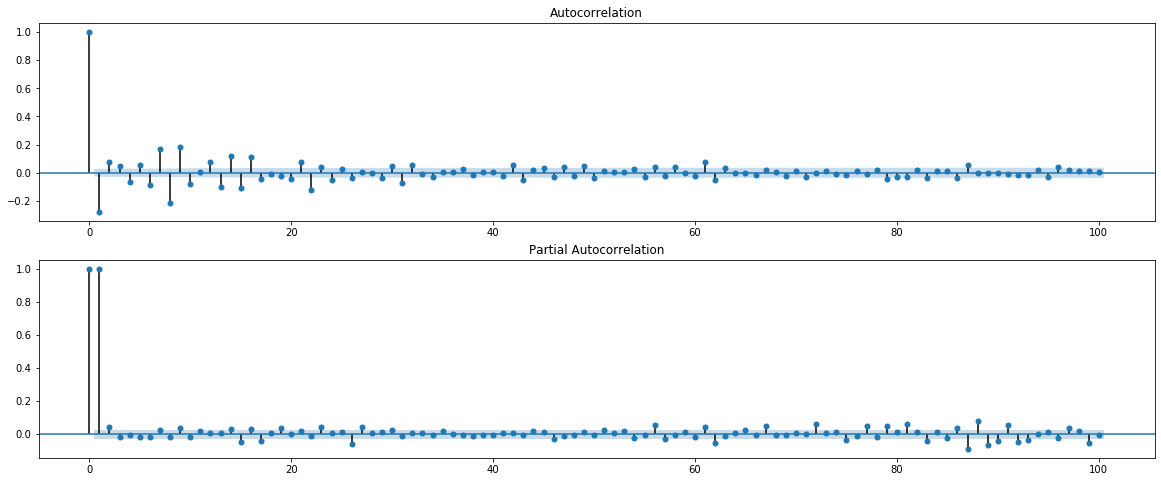

In [14]:
# Plotting ACF and PACF for the data with shift

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf((data['Close']-data['Close'].shift(1)).iloc[13:],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:],lags=100,ax=ax2)

### Splitting data between Training and Testing

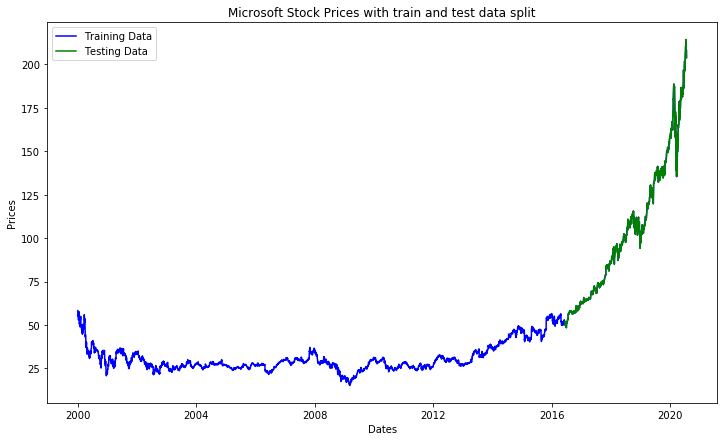

In [15]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Microsoft Stock Prices with train and test data split')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [16]:
print(train_data['Close'].values)
print(test_data)

[58.28125  56.3125   56.90625  ... 51.790001 52.130001 52.099998]
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-06-08   52.020000   52.439999   51.869999   52.040001   48.406471   
2016-06-09   52.000000   52.000000   51.490002   51.619999   48.015793   
2016-06-10   51.049999   52.049999   51.040001   51.480000   47.885574   
2016-06-13   49.580002   50.720001   49.060001   50.139999   46.639130   
2016-06-14   49.900002   50.099998   49.570000   49.830002   46.350780   
...                ...         ...         ...         ...         ...   
2020-07-10  213.619995  214.080002  211.080002  213.669998  213.669998   
2020-07-13  214.479996  215.800003  206.500000  207.070007  207.070007   
2020-07-14  206.130005  208.850006  202.029999  208.350006  208.350006   
2020-07-15  209.559998  211.330002  205.029999  208.039993  208.039993   
2020-07-16  205.399994  205.699997  202.309998

## Part II: Classical Time Series Forecasting Methods

### MODEL 1: ARIMA

##### In our demo for ARIMA(p,d,q):

p - we used five previous periods of our time series. For our dataset we assumed the data to have some sort of seasonality, since the stocks are traded only during the workdays.
d - differencing. Since our original data is non-stationary, differencing helps to convert it to stationary. It was enough to convert to the first-order differencing to get results. A good value can be 1, 2, 3
q - number of lagged forecast errors. We put it to 0 and thus didn't consider.

In [23]:
from statsmodels.tsa.arima_model import ARIMA

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history_AR = [x for x in train_ar]
print(type(history_AR))
predictions_AR = list()

for t in range(len(test_ar)):
    model_AR = ARIMA(history_AR, order=(1,1,0))
    model_fit_AR = model_AR.fit(disp=0)
    output_AR = model_fit_AR.forecast()
    yhat_AR = output_AR[0]
    predictions_AR.append(yhat_AR)
    obs_AR = test_ar[t]
    history_AR.append(obs_AR)

<class 'list'>


c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'Stock prices each day from 2000-2020')

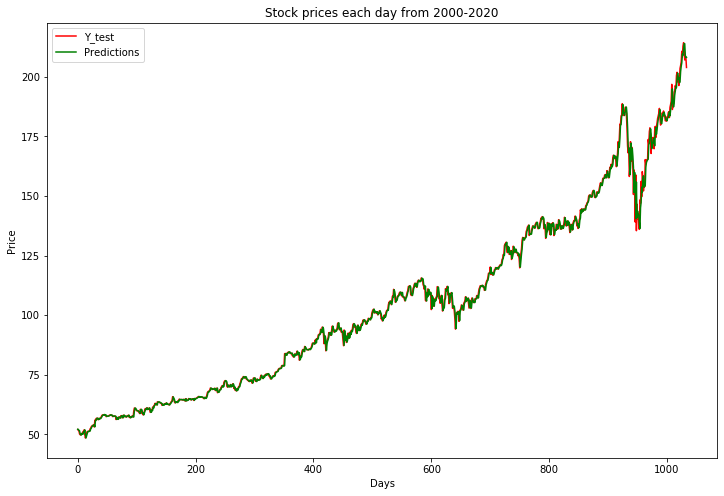

In [24]:
plt.figure(figsize=(12,8))
plt.plot(test_ar, color='red', label='Y_test')
plt.plot(predictions_AR, color='green', label = 'Predictions')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Stock prices each day from 2000-2020")

In [25]:
from sklearn.metrics import mean_squared_error
error_ar = mean_squared_error(test_ar, predictions_AR)
print('Testing Mean Squared Error: %.3f' % error_ar)

Testing Mean Squared Error: 4.780


### Results of ARIMA with different setups is as follows:
#### p = 1, d = 1, q = 0 Testing Mean Squared Error: 4.780
#### p = 2, d = 1, q = 0 Testing Mean Squared Error: 4.830
#### p = 5, d = 1, q = 0 Testing Mean Squared Error: 4.896


In [26]:
print(model_fit_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5165
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7918.499
Method:                       css-mle   S.D. of innovations              1.121
Date:                Tue, 21 Jul 2020   AIC                          15842.998
Time:                        20:31:27   BIC                          15862.647
Sample:                             1   HQIC                         15849.874
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.012      2.379      0.017       0.005       0.053
ar.L1.D.y     -0.2753      0.013    -20.573      0.000      -0.301      -0.249
                                    Roots           

## MODEL 2: SARIMA

In [90]:
import statsmodels.api as sm

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = sm.tsa.statespace.SARIMAX(history, order=(1,1,0), seasonal_order=(0,1,1,12))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


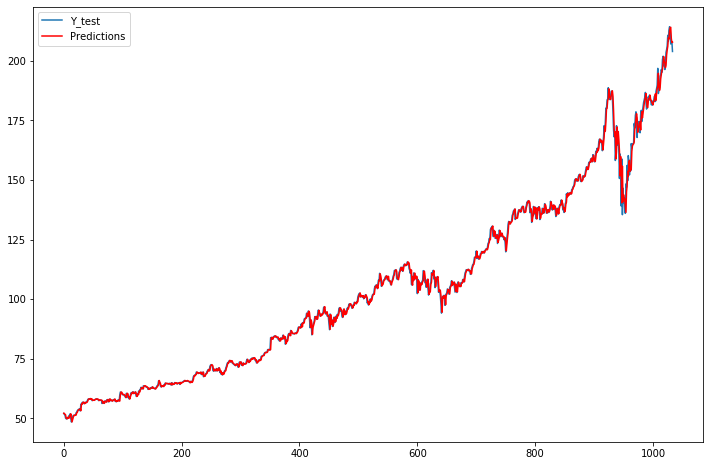

In [94]:
plt.figure(figsize=(12,8))
plt.plot(test_ar, label='Y_test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()

In [92]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 4.750


In [93]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 5166
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -7915.904
Date:                              Tue, 21 Jul 2020   AIC                          15837.808
Time:                                      07:29:01   BIC                          15857.450
Sample:                                           0   HQIC                         15844.682
                                             - 5166                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2797      0.003   -101.950      0.000      -0.285      -0.274
ma.S.L12      -0.98

#### Summary: Results of SARIMAX with different setups is as follows:
##### p = 1, d = 1, q = 0; P = 0, D = 1, Q = 1, s = 12. Testing Mean Squared Error: 4.750
##### p = 1, d = 1, q = 0; P = 0, D = 1, Q = 1, s = 2. Testing Mean Squared Error: 4.772
##### p = 1, d = 1, q = 0; P = 0, D = 1, Q = 1, s = 5. Testing Mean Squared Error: 4.777

## MODEL 3: HOLT-WINTERS'

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history_h = [x for x in train_ar]
predictions_h = list()

for t in range(len(test_ar)):
    model_h = ExponentialSmoothing(history_h ,seasonal_periods=7,trend='mul', seasonal='mul')
    model_fit_h = model_h.fit()
    output_h = model_fit_h.forecast()
    yhat_h = output_h[0]
    predictions_h.append(yhat_h)
    obs_h = test_ar[t]
    history_h.append(obs_h)

c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [31]:
predictions_h = pd.DataFrame(predictions_h)
print(len(predictions_h))
k=predictions_h.fillna(method='ffill') # Filling NaNs with previous values
preds=k.values.tolist()

1034


In [32]:
error_h = mean_squared_error(test_data['Close'].values, preds)
print('Testing Mean Squared Error: %.3f' % error_h)

Testing Mean Squared Error: 4.712


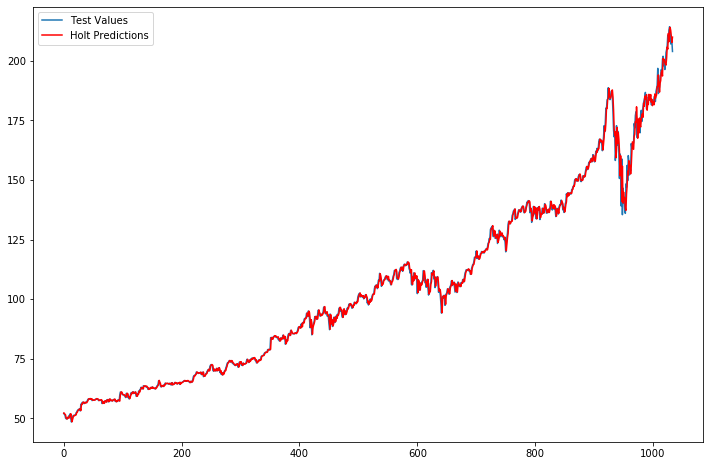

In [33]:
plt.figure(figsize=(12,8))
plt.plot(test_ar,label='Test Values')
plt.plot(predictions_h, color='red',label='Holt Predictions')
plt.legend()

In [34]:
print(model_fit_h.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 5166
Model:             ExponentialSmoothing   SSE                           6369.799
Optimized:                         True   AIC                           1104.118
Trend:                   Multiplicative   BIC                           1176.166
Seasonal:                Multiplicative   AICC                          1104.189
Seasonal Periods:                     7   Date:                 Tue, 21 Jul 2020
Box-Cox:                          False   Time:                         21:10:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7553454                alpha                 True
smoothing_slope          

#### Summary: Results of HOLT-WINTERS' for different setups are as follows:

##### seasonal_periods=7 ,trend='mul', seasonal='mul'. Mean Squared Error: 4.703
##### seasonal_periods=5 ,trend='add', seasonal='add'. Mean Squared Error: 4.796
##### seasonal_periods=5 ,trend='mul', seasonal='mul'. Mean Squared Error: 4.793
##### seasonal_periods=5 ,trend='multiplicative', seasonal='multiplicative'. Mean Squared Error: 4.793

### Comparison of the results of all statistical models used.

In [ ]:
# FINAL SUMMARY FOR ALL MODELS

##Arima with different p, d, q values:
# 1 1 0 Testing Mean Squared Error: 4.780
# 2 1 0 Testing Mean Squared Error: 4.830
# 5 1 0 Testing Mean Squared Error: 4.896

## Sarima with p, d, q and P, D, Q and s values:
# 1,1,0 0,1,1,12 Testing Mean Squared Error: 4.750
# 1,1,0 0,1,1,2 Testing Mean Squared Error: 4.772
# 1,1,0 0,1,1,5 Testing Mean Squared Error: 4.777

## Holt-Linear with different smoothing levels and slopes:
# smoothing_level = 0.3,smoothing_slope = 0.1. Testing Mean Squared Error: 6.419.
# smoothing_level = 0.5,smoothing_slope = 0.3. Testing Mean Squared Error: 5.219.
# smoothing_level = 0.1,smoothing_slope = 0.1. Testing Mean Squared Error: 17.742

## Holt-Winters' with different seasonal periods, trend and seasonal types:
# seasonal_periods=7,trend='mul', seasonal='mul' Mean Squared Error: 4.703
# seasonal_periods=5,trend='add', seasonal='add' Mean Squared Error: 4.796
# seasonal_periods=5,trend='mul', seasonal='mul' Mean Squared Error: 4.793


Text(0.5, 1.0, 'Comparison of MSEs of all statistical models')

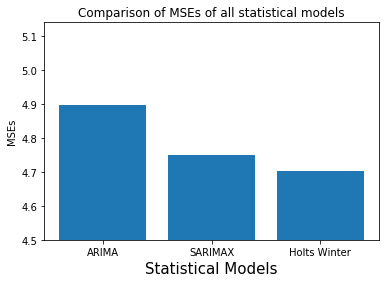

In [136]:
MSEs = [float(error_ar),float(error),float(error_h)]
model = ['ARIMA', 'SARIMAX', 'Holts Winter']
plt.bar(model, MSEs)
plt.xlabel('Statistical Models', fontsize=15)
plt.ylabel('MSEs')
plt.ylim(4.5)
plt.title('Comparison of MSEs of all statistical models')

In [35]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history_HL = [x for x in train_ar]
predictions_HL = list()

for t in range(len(test_ar)):
    model_fit_HL = Holt(history_HL).fit(smoothing_level = 0.5,smoothing_slope = 0.3)
    output_HL = model_fit_HL.forecast()
    yhat_HL = output_HL[0]
    predictions_HL.append(yhat_HL)
    obs_HL = test_ar[t]
    history_HL.append(obs_HL)

c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Testing Mean Squared Error: 5.219


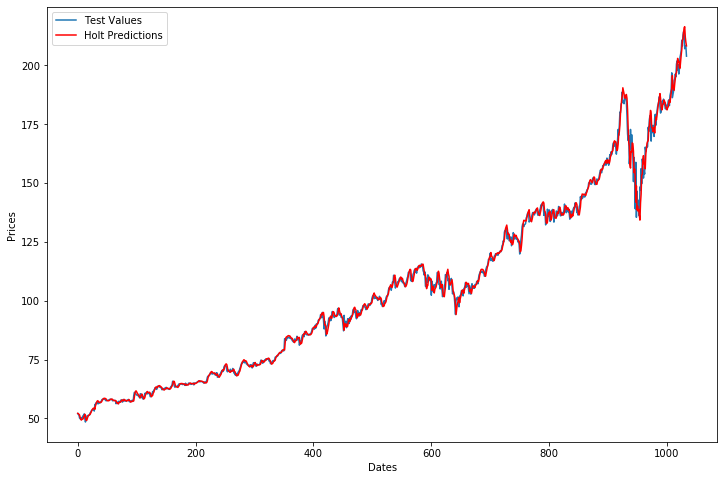

In [36]:
error_HL = mean_squared_error(test_data['Close'].values, predictions_HL)
print('Testing Mean Squared Error: %.3f' % error_HL)

plt.figure(figsize=(12,8))
plt.plot(test_ar,label='Test Values')
plt.plot(predictions_HL, color='red',label='Holt Predictions')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [37]:
print(model_fit_HL.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                 5166
Model:                           Holt   SSE                           7649.019
Optimized:                       True   AIC                           2035.545
Trend:                       Additive   BIC                           2061.744
Seasonal:                        None   AICC                          2035.561
Seasonal Periods:                None   Date:                 Tue, 21 Jul 2020
Box-Cox:                        False   Time:                         21:14:22
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
smoothing_slope            0.3000000                

#### Summary: Results of HOLT-LINEAR for different setups are as follows:
##### smoothing_level = 0.3,smoothing_slope = 0.1. Testing Mean Squared Error: 6.419.
##### smoothing_level = 0.5,smoothing_slope = 0.3. Testing Mean Squared Error: 5.219.

Text(0.5, 1.0, 'Comparison of MSEs of all statistical models')

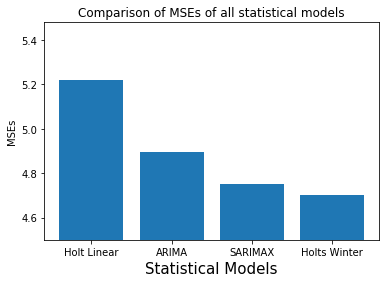

In [145]:
MSEs = [float(error_HL),float(error_ar),float(error),float(error_h)]
model = ['Holt Linear','ARIMA', 'SARIMAX', 'Holts Winter']
plt.bar(model, MSEs)
plt.xlabel('Statistical Models', fontsize=15)
plt.ylabel('MSEs')
plt.ylim(4.5)
plt.title('Comparison of MSEs of all statistical models')

In [ ]:
# Summary:

# ARIMA : It models the next step in the sequence as a linear function of the differenced observations and residual 
#         errors at prior time steps.The method is suitable for univariate time series with trend and without seasonal
#         components.
# SARIMA : It models the next step in the sequence as a linear function of the differenced observations, errors, 
#          differenced seasonal observations, and seasonal errors at prior time steps. The method is suitable for 
#          univariate time series with trend and/or seasonal components.
# The Holt Winter’s Exponential Smoothing (HWES) : The method models the next time step as an exponentially weighted 
#          linear function of observations at prior time steps, taking trends and seasonality into account.
#          The method is suitable for univariate time series with trend and/or seasonal components.    